In [120]:
import pandas as pd
from plotnine import *
import seaborn as sns

In [4]:
url_client = 'https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/mwc22/mwc22-client_table.csv'
df = pd.read_csv(url_client, 
                 decimal = ',',
                 header = 0,
                 names = ['client_id', 'client_segment', 'avg_conso', 'avg_basket_size', 'received_communication']
                 #dtype = {'AVG CONSO': 'float64', 'AVG BASKET SIZE': 'float64'}
                 )

In [5]:
df.head()

,client_id,client_segment,avg_conso,avg_basket_size,received_communication
0,24321771,6,67.25,201.75,0
1,24321859,2,58.33,350.00,0
2,24321880,3,46.67,112.00,0
3,24321957,2,50.00,600.00,0
4,24321962,4,10.00,120.00,0


In [147]:
mldf = df.copy()

# Clients Dataframe

## Missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   client_id               35884 non-null  int64  
 1   client_segment          35884 non-null  int64  
 2   avg_conso               35884 non-null  float64
 3   avg_basket_size         35884 non-null  float64
 4   received_communication  35884 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


In [130]:
df.isna().sum()

client_id                 0
client_segment            0
avg_conso                 0
avg_basket_size           0
received_communication    0
dtype: int64

### No missing values

## Data types

In [28]:
df.nunique()

client_id                 35884
client_segment                6
avg_conso                  1494
avg_basket_size            3974
received_communication        2
dtype: int64

### Categorical: client_id, client_segment and received_communiation
### Numerical: avg_conso and avg_basket_size

In [125]:
categoricals = ['client_id', 'client_segment', 'received_communication']
numericals = ['avg_conso', 'avg_basket_size']

#### Cast into Categorical 

In [126]:
for col in categoricals:
    df[col] = pd.Categorical(df[col])

In [127]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_conso,35884.0,64.534437,64.381932,0.83,20.83,50.0,88.17,2433.33
avg_basket_size,35884.0,181.218610,129.604691,10.00,100.00,160.0,225.00,3400.20


In [128]:
df['received_communication'].value_counts(normalize = True)

1    0.507998
0    0.492002
Name: received_communication, dtype: float64

# Orders Dataframe

In [9]:
orders_url = 'https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/mwc22/mwc22-orders_table.csv'
orders_df = pd.read_csv(orders_url,
                        header = 0, 
                        names = ['client_id', 'nb_prods','order_id', 'fruit_product'],
                        dtype = {'nb_prods': 'int64'})

## Missing values 

In [132]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66912 entries, 0 to 66911
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   client_id      66912 non-null  int64 
 1   nb_prods       66912 non-null  int64 
 2   order_id       66912 non-null  int64 
 3   fruit_product  66912 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


In [133]:
orders_df.isna().sum()

client_id        0
nb_prods         0
order_id         0
fruit_product    0
dtype: int64

### No missing values

In [11]:
orders_df.head()

,client_id,nb_prods,order_id,fruit_product
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange
2,18070505,5,671907264,Kiwi
3,18070505,10,671907264,Pear
4,18070505,5,671907264,Cheery


In [12]:
orders_df['fruit_product'].value_counts().sort_index()

Apple          3439
Apricot        2277
Banana         3408
Blueberry      1696
Cheery         4071
Coconut        2429
Devil Fruit    2173
Grape          3126
Jackfruit       790
Kiwi           6431
Lemon          5664
Lime           1656
Mango          1839
Melon          1345
Nectarine      3520
Nuwe Fruit     3688
Orange         5997
Papaya         1944
Pear           3682
Pineapple      1273
Plum           1788
Pomegranate    1623
Strawberry     1642
Watermelon     1411
Name: fruit_product, dtype: int64

In [13]:
orders_df.groupby(by = ['client_id', 'order_id'], as_index = False).agg('mean')

,client_id,order_id,nb_prods
0,18070505,671907264,7.000000
1,18071016,675229714,8.333333
2,18071233,673537725,3.750000
3,18071668,667987414,6.000000
4,18071668,676680651,2.500000
...,...,...,...
17453,48341696,669547626,20.000000
17454,48341727,678012260,5.000000
17455,48352045,670065547,1.250000
17456,48365750,670187349,5.000000


In [14]:
orders_df.drop('order_id', axis = 1).groupby(by = ['client_id'], as_index = False).agg('mean')

,client_id,nb_prods
0,18070505,7.000000
1,18071016,8.333333
2,18071233,3.750000
3,18071668,3.000000
4,18072186,7.500000
...,...,...
14494,48341696,6.666667
14495,48341727,5.000000
14496,48352045,1.250000
14497,48365750,5.000000


In [15]:
id = 18071668

In [16]:
df[df['client_id'] == int(id)]

,client_id,client_segment,avg_conso,avg_basket_size,received_communication


In [17]:
orders_df[orders_df['client_id'] == id]

,client_id,nb_prods,order_id,fruit_product
19,18071668,2,676680651,Blueberry
20,18071668,2,676680651,Plum
21,18071668,2,676680651,Orange
22,18071668,4,676680651,Nectarine
23,18071668,6,667987414,Nectarine
24,18071668,2,676680651,Devil Fruit
25,18071668,3,676680651,Nuwe Fruit


In [18]:
test_url ='https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/mwc22/mwc22-client_table+-+test_x.csv'
test_df = pd.read_csv(test_url,
                        decimal = ',',
                        header = 0,
                        names = ['client_id', 'avg_conso', 'avg_basket_size', 'received_communication']
                        )

In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   client_id               19 non-null     int64  
 1   avg_conso               19 non-null     float64
 2   avg_basket_size         19 non-null     float64
 3   received_communication  19 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 736.0 bytes


In [20]:
test_df

,client_id,avg_conso,avg_basket_size,received_communication
0,48352078,8.33,100.00,0
1,18072186,93.42,186.83,1
2,48352246,45.83,137.50,0
3,18070621,16.67,200.00,1
4,48352262,13.33,160.00,0
5,48359553,16.67,200.00,0
6,18071647,8.33,100.00,1
7,48359574,54.17,162.50,0
8,48359627,26.67,106.67,0
9,18070505,166.67,333.33,1


In [136]:
test_df[test_df['client_id'].isin(orders_df['client_id'])]

,client_id,avg_conso,avg_basket_size,received_communication
1,18072186,93.42,186.83,1
9,18070505,166.67,333.33,1
10,18071016,145.00,290.00,1
12,18071233,85.92,343.67,1
14,18071668,154.83,109.29,1
17,18072741,158.42,211.22,1
18,18072797,110.83,133.00,1


## Graphs

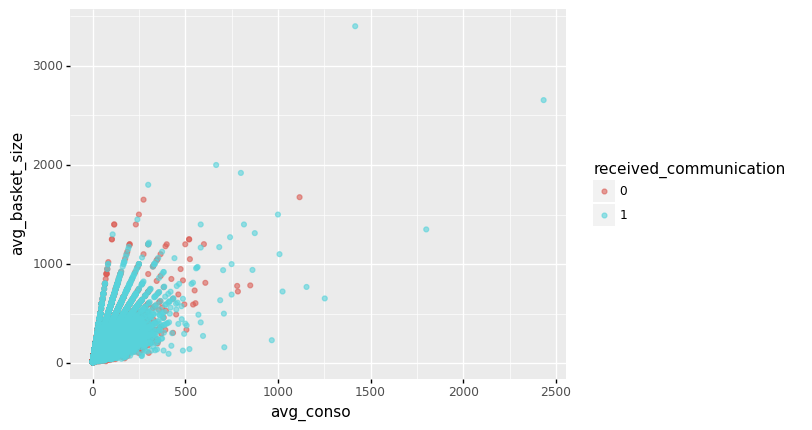

<ggplot: (358330134)>

In [106]:
ggplot(df, aes(x = 'avg_conso', y = 'avg_basket_size', color = 'received_communication' )) + geom_point(alpha = 0.6)

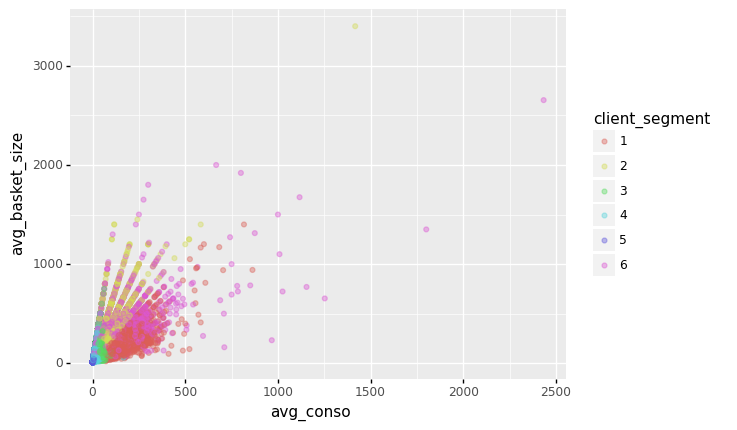

<ggplot: (358638809)>

In [107]:
ggplot(df, aes(x = 'avg_conso', y = 'avg_basket_size', color = 'client_segment' )) + geom_point(alpha = 0.4)

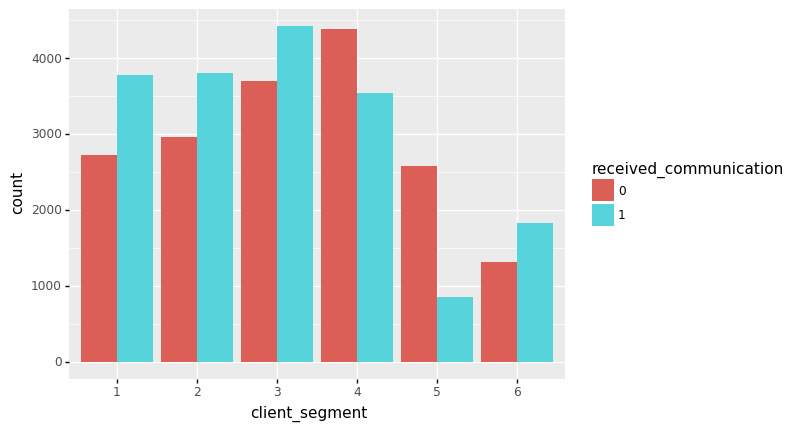

<ggplot: (687663111)>

In [119]:
(ggplot(df, aes(x = 'client_segment', fill = 'received_communication')) 
 + geom_bar(stat = 'count', position = 'dodge'))

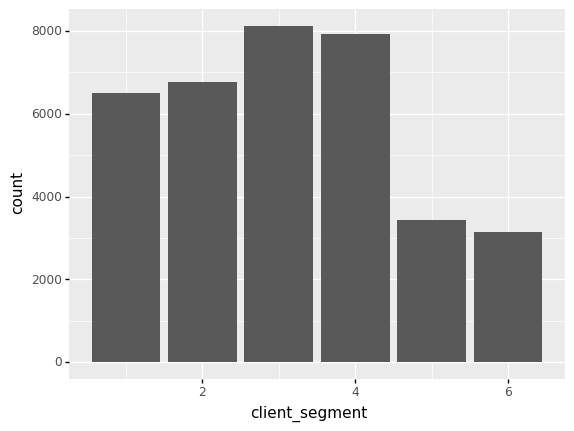

<ggplot: (355345607)>

In [117]:
melted = df.melt(id_vars = ['client_segment', 'received_communication'], value_vars = ['avg_basket_size' ])
cats = ['client_segment','received_communication']
for col in cats   :
    melted[col] = pd.Categorical(melted[col])

In [118]:
melted.tail()

,client_segment,received_communication,variable,value
35879,4,1,avg_basket_size,150.00
35880,3,1,avg_basket_size,112.50
35881,3,1,avg_basket_size,125.00
35882,3,1,avg_basket_size,125.17
35883,1,1,avg_basket_size,152.86


In [114]:
melted_conso = df.melt(id_vars = ['client_segment', 'received_communication'], value_vars = ['avg_conso' ])
for col in cats  : 
    melted_conso[col] = pd.Categorical(melted_conso[col])

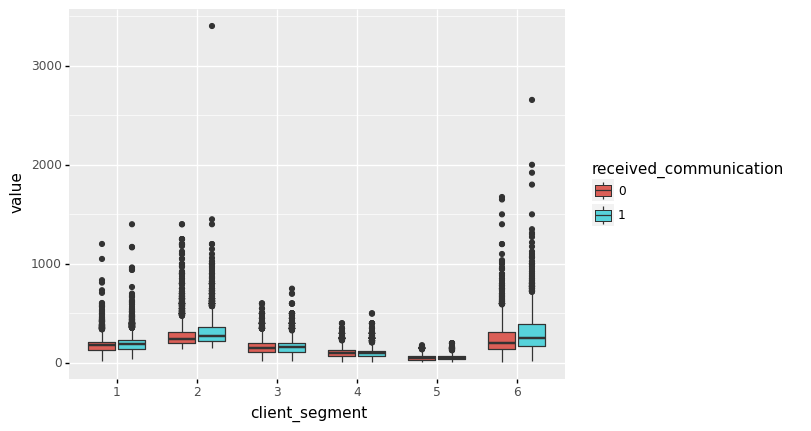

<ggplot: (686133788)>

In [115]:
ggplot(melted, aes(y = 'value', x = 'client_segment', fill = 'received_communication')) + geom_boxplot() 

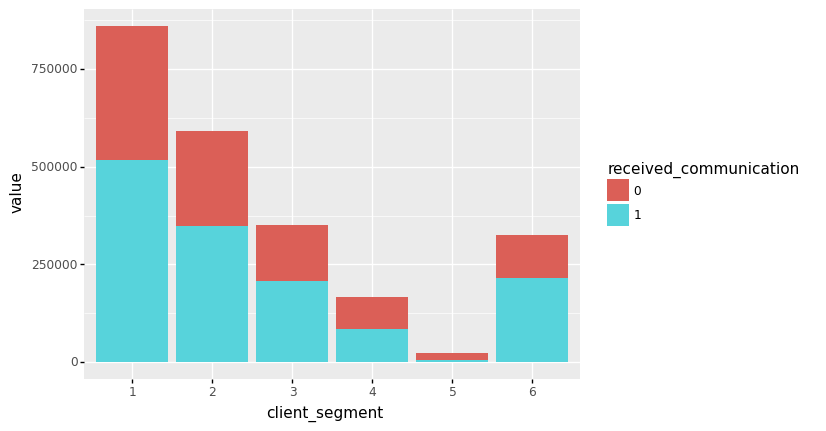

<ggplot: (360425650)>

In [116]:
ggplot(melted_conso, aes(y = 'value', x = 'client_segment', fill = 'received_communication')) + geom_col() 

# Modeling

In [258]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import f1_score

In [148]:
mldf = mldf.set_index('client_id')

In [167]:
X = mldf.drop('client_segment', axis = 1)[:25_000]
y = pd.to_numeric(mldf['client_segment'][:25_000])

In [198]:
X.tail

<bound method NDFrame.tail of            avg_conso  avg_basket_size received_communication
client_id                                                   
24321771       67.25           201.75                      0
24321859       58.33           350.00                      0
24321880       46.67           112.00                      0
24321957       50.00           600.00                      0
24321962       10.00           120.00                      0
...              ...              ...                    ...
20069041       88.33           530.00                      1
20069390        7.50            90.00                      1
20069643      154.17           185.00                      1
20069776      162.50           278.57                      1
20069920       57.50           115.00                      1

[25000 rows x 3 columns]>

In [196]:
lr = LogisticRegression(random_state = 33, class_weight = 'balanced', multi_class = 'multinomial', solver = 'newton-cg')
lr.fit(X,y)
pred = lr.predict(X)
f1_score(y, pred, average = 'macro')

0.6228003254883291

In [197]:
cross_val_score(lr, X, y, cv = 5, scoring = 'f1_macro')

array([0.62583557, 0.5981561 , 0.59313921, 0.62372413, 0.57714951])

In [203]:
X_test = mldf.drop('client_segment', axis = 1)[25_000:]
y_test = pd.to_numeric(mldf['client_segment'][25_000:])

In [205]:
test_preds = lr.predict(X_test)
f1_score(y_test, test_preds, average = 'macro')

0.6353528512500686

,avg_conso,avg_basket_size,received_communication
client_id,,,
20070093,37.50,225.00,1
20070101,166.67,1000.00,1
20070146,129.83,222.57,1
20070594,3.33,40.00,1
20070611,89.83,98.00,1
...,...,...,...
48345531,12.50,150.00,1
48345686,37.50,112.50,1
48365750,41.67,125.00,1


### LogisticRegressionCV

In [186]:
clf = LogisticRegressionCV(cv = 5, random_state = 33, max_iter = 10_000)

In [187]:
clf.fit(X,y)

LogisticRegressionCV(cv=5, max_iter=10000, random_state=33)

In [189]:
preds = clf.predict(X)

In [191]:
f1_score(y, preds, average = 'macro')

0.6555165210215363

In [210]:
cross_val_score(clf, X, y, cv = 5, scoring = 'f1_macro')

array([0.65042109, 0.6512786 , 0.63995748, 0.66826311, 0.61922072])

### Random Forest

In [226]:
rf = RandomForestClassifier(random_state = 33, class_weight = 'balanced')
rf.fit(X,y)
preds_rf = rf.predict(X)
f1_score(y, preds_rf, average = 'macro')

0.7715611410159301

In [227]:
cv_rf = cross_val_score(rf, X, y, cv = 5, scoring = 'f1_macro')
cv_rf.mean()

0.6777638184447232

In [234]:
test_preds_rf = rf.predict(X_test.values)
f1_score(y_test.values, test_preds_rf, average = 'macro')

/Users/jaume/miniforge3/envs/sklearn-dev/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


0.6903226795056859

### Histogram Gradient Boosting

In [225]:
hbg = HistGradientBoostingClassifier(random_state = 33, categorical_features = [False, False, True], scoring = 'f1_macro').fit(X.values,y)
preds_hbg = hbg.predict(X.values)
f1_score(y, preds_hbg, average = 'macro')

0.6955257877312073

In [229]:
cv_hbg = cross_val_score(hbg, X.values, y, cv = 5, scoring = 'f1_macro')
cv_hbg.mean()

0.6791585888715032

In [232]:
test_preds_hbg = hbg.predict(X_test.values)
f1_score(y_test, test_preds_hbg, average = 'macro')

0.6893701831573833

### Hyperparameter Optimization

In [243]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#### Random Forest

Create a Hyperparameter grid

In [250]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['gini', 'entropy']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}


In [253]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_grid, scoring = 'f1_macro',
                               n_iter = 200, cv = 5, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X.values, y.values)

# View the best parameters from the random search
rf_random.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


{'n_estimators': 400,
 'min_samples_split': 9,
 'min_impurity_decrease': 0.0,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': True}

In [254]:
test_preds_rf_random = rf_random.predict(X_test.values)
f1_score(y_test, test_preds_rf_random, average = 'macro')

0.7029891582950466

[CV] END bootstrap=False, criterion=entropy, max_depth=30, max_features=log2, min_impurity_decrease=0.0, min_samples_split=6, n_estimators=400; total time=   7.0s
[CV] END bootstrap=True, criterion=gini, max_depth=10, max_features=sqrt, min_impurity_decrease=0.05, min_samples_split=7, n_estimators=2000; total time=   9.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=50, max_features=auto, min_impurity_decrease=0.0, min_samples_split=10, n_estimators=400; total time=   5.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=20, max_features=auto, min_impurity_decrease=0.0, min_samples_split=2, n_estimators=1500; total time=  32.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=15, max_features=log2, min_impurity_decrease=0.0, min_samples_split=7, n_estimators=800; total time=  15.6s
[CV] END bootstrap=False, criterion=gini, max_depth=25, max_features=auto, min_impurity_decrease=0.1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END bootstrap=False, 

In [ ]:
rf_final = 

#### Nested CV

In [278]:
cv_inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
# define the model
model = RandomForestClassifier(random_state = 33, class_weight = 'balanced')

# define search space
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = ['sqrt', 'log2']
rf_max_depth = [int(x) for x in np.linspace(5, 55, 4)]
# define search
search = GridSearchCV(model, space, scoring='f1_macro', n_jobs=-1, cv=cv_inner, refit=True, verbose = 2.5)
# configure the cross-validation procedure
cv_outer = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# execute the nested cross-validation
scores = cross_val_score(search, X_full, y_full, scoring='f1_macro', cv=cv_outer, n_jobs=-1, verbose = 1)
# report performance
print('F1 Macro: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  1.2min remaining:   47.7s


F1 Macro: 0.688 (0.005)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.4min finished


In [280]:
search.fit(X_full, y_full)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=33),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             scoring='f1_macro', verbose=2.5)

In [281]:
search.best_estimator_

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=500, random_state=33)

In [282]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.169527,0.009500,0.026934,0.002022,sqrt,10,"{'max_features': 'sqrt', 'n_estimators': 10}",0.683987,0.689853,0.687492,0.687111,0.002410,5
1,1.366716,0.031163,0.189273,0.010630,sqrt,100,"{'max_features': 'sqrt', 'n_estimators': 100}",0.683039,0.691429,0.686915,0.687128,0.003428,3
2,6.196492,0.025502,0.794197,0.008197,sqrt,500,"{'max_features': 'sqrt', 'n_estimators': 500}",0.684178,0.691351,0.686089,0.687206,0.003033,1
3,0.139658,0.010474,0.022102,0.002460,log2,10,"{'max_features': 'log2', 'n_estimators': 10}",0.683987,0.689853,0.687492,0.687111,0.002410,5
4,1.358109,0.042574,0.181022,0.007516,log2,100,"{'max_features': 'log2', 'n_estimators': 100}",0.683039,0.691429,0.686915,0.687128,0.003428,3
5,5.865842,0.037887,0.679084,0.008537,log2,500,"{'max_features': 'log2', 'n_estimators': 500}",0.684178,0.691351,0.686089,0.687206,0.003033,1


In [283]:
#test_preds_hbg = hbg.predict(X_test.values)
f1_score(y_test, search.predict(X_test), average = 'macro')

0.7612523007806185

## Predictions for the test set

In [288]:
final_predictions = search.predict(test_df.drop('client_id', axis = 1).values)

/Users/jaume/miniforge3/envs/sklearn-dev/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


In [299]:
submission = pd.Series(data = final_predictions, 
                       index = test_df.set_index('client_id').index, 
                       name = 'CLIENT_SEGMENT')
submission.rename_axis('CLIENT ID', inplace = True) 

In [300]:
submission

CLIENT ID
48352078    5
18072186    1
48352246    3
18070621    4
48352262    4
48359553    4
18071647    5
48359574    3
48359627    4
18070505    1
18071016    1
18071198    6
18071233    2
18071524    5
18071668    1
18072476    6
48352272    3
18072741    1
18072797    1
Name: CLIENT_SEGMENT, dtype: int64

In [301]:
submission.to_csv('results.csv')

In [287]:
test_df.set_index('client_id').index

Int64Index([48352078, 18072186, 48352246, 18070621, 48352262, 48359553,
            18071647, 48359574, 48359627, 18070505, 18071016, 18071198,
            18071233, 18071524, 18071668, 18072476, 48352272, 18072741,
            18072797],
           dtype='int64', name='client_id')

#### Histogram Gradient Boosting

In [ ]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['gini', 'entropy']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}



In [ ]:
!pip install optuna

In [221]:
import optuna

In [239]:
if __name__ == "__main__":
    hbgg = HistGradientBoostingClassifier(random_state = 33, categorical_features = [False, False, True], scoring = 'f1_macro')

    param_distributions = {
        #"learning_rate": optuna.distributions.LogUniformDistribution(1e-10, 1e-1),
        "max_iter": optuna.distributions.IntUniformDistribution(50, 150, 20),
        #"min_samples_leaf": optuna.distributions.IntUniformDistribution(10, 20),
    }

    optuna_search = optuna.integration.OptunaSearchCV(
        hbgg, param_distributions, n_trials=100, timeout=600, verbose=2
    )

    
    optuna_search.fit(X.values, y)

    print("Best trial:")
    trial = optuna_search.study_.best_trial

    print("  Value: ", trial.value)
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

/var/folders/z9/sv4y881d1zbgx2b81_3rfkk40000gn/T/ipykernel_35227/211163302.py:10: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2022-02-13 17:13:12,761] A new study created in memory with name: no-name-c885e65e-35f0-401c-b8c8-7806c20caf12
[I 2022-02-13 17:13:12,762] Searching the best hyperparameters using 25000 samples...
/Users/jaume/miniforge3/envs/sklearn-dev/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jaume/miniforge3/envs/sklearn-dev/lib/pyth

NotFittedError: All estimators failed to fit

In [215]:
X_full = mldf.drop('client_segment', axis = 1)
y_full = pd.to_numeric(mldf['client_segment'])

In [216]:
cross_val_score(hbg, X_full, y_full, cv = 5, scoring = 'f1_macro')

array([0.67560255, 0.67228329, 0.69747635, 0.71429224, 0.654606  ])

In [157]:
from sklearn.metrics import SCORERS

In [159]:
sorted(SCORERS.keys())


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

# Automated EDA (sanity check)

In [32]:
import pandas_profiling
#Generating PandasProfiling Report
report = pandas_profiling.ProfileReport(df)

In [33]:
report

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
report2 = pandas_profiling.ProfileReport(orders_df)
report2

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]